In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [84]:
df_data=pd.read_csv("Downloads/AQI_Data.csv")
df_data

,State,City,PM2.5,PM10,O3,SO2,CO,Wind Speed,Humidity,Temp,AQI,AQI Type
0,Andaman and Nicobar Islands,Port Blair,12.0,20.0,NaN,NaN,NaN,7.0,89.0,28.0,20.0,Good
1,Andhra Pradesh,Vinukonda,36.0,53.0,27.0,14.0,451.0,22.0,68.0,28.0,59.0,Satisfactory
2,Andhra Pradesh,Darsi,35.0,53.0,24.0,8.0,308.0,26.0,69.0,28.0,58.0,Satisfactory
3,Andhra Pradesh,Govindapuram,36.0,55.0,22.0,10.0,321.0,19.0,68.0,28.0,60.0,Satisfactory
4,Andhra Pradesh,Pedda Nakkala Palem,37.0,58.0,23.0,8.0,306.0,23.0,67.0,29.0,61.0,Satisfactory
...,...,...,...,...,...,...,...,...,...,...,...,...
398,West Medinipur,Kharar,58.0,83.0,3.0,3.0,103.0,11.0,94.0,26.0,97.0,Satisfactory
399,West Bengal,Bardhaman,53.0,76.0,2.0,1.0,89.0,14.0,84.0,28.0,89.0,Satisfactory
400,West Bengal,Patrasayer,53.0,76.0,2.0,1.0,89.0,8.0,91.0,27.0,89.0,Satisfactory
401,West Bengal,Talchinan-Sanihati,21.0,41.0,27.0,9.0,965.0,14.0,84.0,28.0,49.0,Good


In [7]:
df.info()

NameError: name 'df' is not defined

In [ ]:
mask=df.isna().any(axis=1)
df[mask]

filling the missing values using mean,median and mode

In [89]:
df_data.isnull().sum()

State         0
City          0
PM2.5         0
PM10          0
O3            0
SO2           0
CO            0
Wind Speed    0
Humidity      0
Temp          0
AQI           0
AQI Type      0
dtype: int64

In [86]:
df_data['PM2.5'] = df_data.groupby('State')['PM2.5'].transform(lambda x: x.fillna(x.mean()))
df_data['PM10'] = df_data.groupby('State')['PM2.5'].transform(lambda x: x.fillna(x.mean()))
df_data['O3'] = df_data.groupby('State')['PM2.5'].transform(lambda x: x.fillna(x.mean()))
df_data['SO2'] = df_data.groupby('State')['PM2.5'].transform(lambda x: x.fillna(x.mean()))
df_data['CO'] = df_data.groupby('State')['PM2.5'].transform(lambda x: x.fillna(x.mean()))
df_data['Wind Speed'] = df_data.groupby('State')['PM2.5'].transform(lambda x: x.fillna(x.mean()))

In [87]:
df_data

,State,City,PM2.5,PM10,O3,SO2,CO,Wind Speed,Humidity,Temp,AQI,AQI Type
0,Andaman and Nicobar Islands,Port Blair,12.0,12.0,12.0,12.0,12.0,12.0,89.0,28.0,20.0,Good
1,Andhra Pradesh,Vinukonda,36.0,36.0,36.0,36.0,36.0,36.0,68.0,28.0,59.0,Satisfactory
2,Andhra Pradesh,Darsi,35.0,35.0,35.0,35.0,35.0,35.0,69.0,28.0,58.0,Satisfactory
3,Andhra Pradesh,Govindapuram,36.0,36.0,36.0,36.0,36.0,36.0,68.0,28.0,60.0,Satisfactory
4,Andhra Pradesh,Pedda Nakkala Palem,37.0,37.0,37.0,37.0,37.0,37.0,67.0,29.0,61.0,Satisfactory
...,...,...,...,...,...,...,...,...,...,...,...,...
398,West Medinipur,Kharar,58.0,58.0,58.0,58.0,58.0,58.0,94.0,26.0,97.0,Satisfactory
399,West Bengal,Bardhaman,53.0,53.0,53.0,53.0,53.0,53.0,84.0,28.0,89.0,Satisfactory
400,West Bengal,Patrasayer,53.0,53.0,53.0,53.0,53.0,53.0,91.0,27.0,89.0,Satisfactory
401,West Bengal,Talchinan-Sanihati,21.0,21.0,21.0,21.0,21.0,21.0,84.0,28.0,49.0,Good


<Axes: >

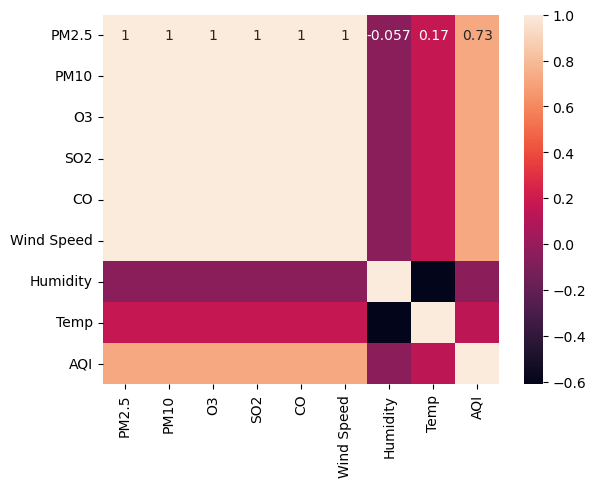

In [88]:
df_heatmap=df_data.drop(["State","City","AQI Type"],axis=1)
sns.heatmap(df_heatmap.corr(),annot=True)

In [ ]:
df_type=df_data['AQI Type'].value_counts()
df_type.index

In [ ]:
sns.countplot(x=df_data["AQI Type"])


In [ ]:
plt.pie(df_type,labels=df_type.values)
plt.legend(df_type.index)

In [ ]:
sns.distplot(df_data["AQI"])

states with high aqi 

In [ ]:
df_data['State'].value_counts()

Feature scaling

In [90]:
df_data.drop(['City','AQI Type'],inplace=True,axis=1)
df_data.drop("State",inplace=True,axis=1)

In [95]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

num_features=['PM2.5','PM10','O3','SO2','CO','Wind Speed','Humidity','Temp']

preprocessor=ColumnTransformer(transformers=[("standardscaler",StandardScaler(),num_features)
                                             ])
                                             
preprocessor.fit_transform(X_train)
preprocessor.transform(X_test)

array([[-0.3309987 , -0.3309987 , -0.3309987 , -0.3309987 , -0.3309987 ,
        -0.3309987 ,  0.97943089, -0.17112421],
       [ 1.82530083,  1.82530083,  1.82530083,  1.82530083,  1.82530083,
         1.82530083,  0.30495101,  0.45559043],
       [ 1.82530083,  1.82530083,  1.82530083,  1.82530083,  1.82530083,
         1.82530083, -0.03228893,  0.45559043],
       [-0.52702593, -0.52702593, -0.52702593, -0.52702593, -0.52702593,
        -0.52702593,  0.30495101,  0.45559043],
       [-1.44181966, -1.44181966, -1.44181966, -1.44181966, -1.44181966,
        -1.44181966, -0.70676881,  0.76894775],
       [-0.3309987 , -0.3309987 , -0.3309987 , -0.3309987 , -0.3309987 ,
        -0.3309987 ,  1.06374088, -0.48448153],
       [-0.72305316, -0.72305316, -0.72305316, -0.72305316, -0.72305316,
        -0.72305316,  1.06374088, -0.79783885],
       [ 1.89064324,  1.89064324,  1.89064324,  1.89064324,  1.89064324,
         1.89064324,  1.06374088,  0.14223311],
       [-0.06962906, -0.06962906

train test split

dependent and independent feature extraction

In [91]:
X=df_data.drop("AQI",axis=1)
y=df_data["AQI"]

In [92]:
X

,PM2.5,PM10,O3,SO2,CO,Wind Speed,Humidity,Temp
0,12.0,12.0,12.0,12.0,12.0,12.0,89.0,28.0
1,36.0,36.0,36.0,36.0,36.0,36.0,68.0,28.0
2,35.0,35.0,35.0,35.0,35.0,35.0,69.0,28.0
3,36.0,36.0,36.0,36.0,36.0,36.0,68.0,28.0
4,37.0,37.0,37.0,37.0,37.0,37.0,67.0,29.0
...,...,...,...,...,...,...,...,...
398,58.0,58.0,58.0,58.0,58.0,58.0,94.0,26.0
399,53.0,53.0,53.0,53.0,53.0,53.0,84.0,28.0
400,53.0,53.0,53.0,53.0,53.0,53.0,91.0,27.0
401,21.0,21.0,21.0,21.0,21.0,21.0,84.0,28.0


In [93]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=42)

model training

In [80]:
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 5.0 MB/s eta 0:00:00a 0:00:010m


In [81]:
!conda install -c conda-forge xgboost -y

Retrieving notices: done
Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.7.14  |       hbd8a1cb_0         152 KB  conda-forge
    certifi-2025.7.14          |     pyhd8ed1ab_0         156 KB  conda-forge
    libcxx-20.1.8              |       ha82da77_0         554 KB  conda-forge
    libxgboost-3.0.2           |   cpu_hf17a1b1_0         1.4 MB  conda-forge
    llvm-openmp-20.1.8         |       hbb9b287_0         277 KB  conda-forge
    openssl-3.5.1              |       h81ee809_0         2.9 MB  conda-forge
    py-xgboost-3.0.2           | cpu_pyhc5f55e3_0         145 KB  conda-forge
    xgboost-3.0.2              | cpu_pyhc1a9e11_0          16 KB  conda-forge
    ------------------

In [96]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

models=[DecisionTreeRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    BaggingRegressor(),
    ExtraTreesRegressor(),
    XGBRegressor()
       ]
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [97]:
rows=[]
for model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    mse_default = mean_squared_error(y_test, y_pred)
    mae_default = mean_absolute_error(y_test, y_pred)
    r2_default = r2_score(y_test, y_pred)
    row={'Model':f"{model.__class__.__name__}",'mean square error':mse_default,'mean absolute error':mae_default,'r2 score':r2_default}
    rows.append(row)
model_data=pd.DataFrame(rows)
print(model_data)

                       Model  mean square error  mean absolute error  r2 score
0      DecisionTreeRegressor         106.466942             4.107438  0.878411
1      RandomForestRegressor         152.844571             5.715379  0.825447
2          AdaBoostRegressor         170.645504            10.259247  0.805117
3        KNeighborsRegressor         231.009256             6.900826  0.736180
4  GradientBoostingRegressor         168.724987             7.476230  0.807311
5           BaggingRegressor         200.859684             6.396212  0.770612
6        ExtraTreesRegressor          62.622777             3.468264  0.928483
7               XGBRegressor         151.397148             5.502807  0.827100


In [108]:
regressor=ExtraTreesRegressor()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)

In [109]:
import pickle
pickle.dump(regressor,open('regressor.pkl','wb'))